(2, 1)
(2, 1)


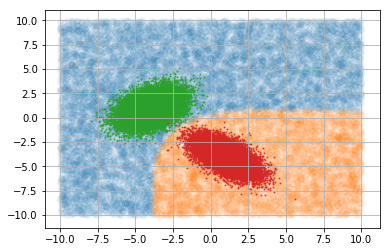

In [10]:
from matplotlib import pyplot as plt
import numpy as np

N         = 20000
mu1       = np.array([ [-4], [1] ])
mu2       = np.array([ [1], [-4] ])
sigma1    = np.array([ [1, 0.4], [0.4, 1] ])
sigma2    = np.array([ [1, -0.6], [-0.6, 1] ])
invSigma1 = np.linalg.inv(sigma1) 
invSigma2 = np.linalg.inv(sigma2) 
detSigma1 = np.log(np.linalg.det(sigma1))
detSigma2 = np.log(np.linalg.det(sigma2))

s1     = np.linalg.cholesky( sigma1 )
s2     = np.linalg.cholesky( sigma2 )


print(np.shape(mu1))
vmu1    = np.tile(mu1,(1,N))
print(np.shape(mu1))
x1     = s1 @ np.random.randn(2,N) + vmu1

vmu2    = np.tile(mu2,(1,N))
x2     = s2 @ np.random.randn(2,N) + vmu2

# Bayesian classifier
phi   = np.zeros((2,N))
rand_x = np.random.rand(2,N)*20 -10
for k in range(0,N-1):
  phi[0,k] = -rand_x[:,k].T @ invSigma1 @ rand_x[:,k] + rand_x[:,k].T @ invSigma1 @ mu1 + mu1.T @ invSigma1 @ rand_x[:,k] - mu1.T @ invSigma1 @ mu1 - detSigma1
  phi[1,k] = -rand_x[:,k].T @ invSigma2 @ rand_x[:,k] + rand_x[:,k].T @ invSigma2 @ mu2 + mu2.T @ invSigma2 @ rand_x[:,k] - mu2.T @ invSigma2 @ mu2 - detSigma2
  

fig = plt.figure()

plt.scatter( rand_x[0, phi[0,:]>phi[1,:] ], rand_x[1, phi[0,:]>phi[1,:] ], alpha=0.04 )
plt.scatter( rand_x[0, phi[0,:]<=phi[1,:] ], rand_x[1, phi[0,:]<=phi[1,:] ], alpha=0.04 )

plt.scatter( x1[0], x1[1], s=1, alpha=0.75  )
plt.scatter( x2[0], x2[1], s=1, alpha=0.75 )

plt.grid(True)
fig.savefig('graph2.png')